In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import nibabel as nib
import cv2
from scipy.ndimage import label, center_of_mass


In [7]:
def watershed_thres(x,y,thres,title):
    bins = 100
    hist, xedges, yedges = np.histogram2d(y, x, bins=bins, range=[[-64, 64], [-64, 64]])

    # normalization
    hist_norm = hist / np.sum(hist)

    # set threshold
    threshold = thres 
    _, thresh = cv2.threshold(hist_norm, threshold, 1, cv2.THRESH_BINARY)

    # Watersheds
    _, markers = cv2.connectedComponents(thresh.astype(np.uint8))
    markers = markers + 1
    markers = cv2.watershed(cv2.cvtColor((hist_norm * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR), markers)

    regions = np.arange(2, markers.max() + 1)
    if len(regions) > 0:
        centers_idx = np.array(center_of_mass(hist, markers, regions))
        centers_idx = np.atleast_2d(centers_idx) 

        x_centers = xedges[:-1][centers_idx[:, 1].astype(int)]
        y_centers = yedges[:-1][centers_idx[:, 0].astype(int)]
        centers = np.column_stack((x_centers, y_centers))
    else:
        centers = np.array([]).reshape(0, 2)  

    # visulization
    hist_aug=np.log1p(hist)  
    plt.figure(figsize=(8, 6))
    plt.imshow(hist_aug, origin="lower", extent=[-64, 64, -64, 64], cmap="Greys", alpha=1.0)

    if centers.shape[0] > 0:
        plt.scatter(centers[:, 0], centers[:, 1], facecolors='none', edgecolors='red',  marker='o', s=50, label="vessel centers")

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()


def load_nii(filename):
    data = nib.load(filename)
    data = data.get_fdata()
    data = np.array(data)
    return data

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


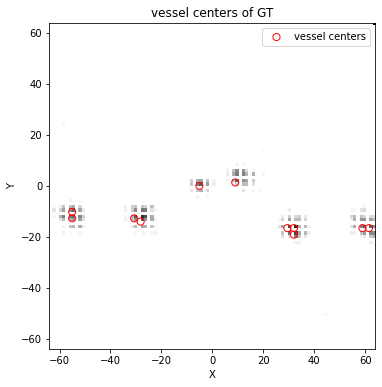

In [8]:
## GT:thres=0.012

x_values = np.arange(64, -65, -2)  # From -64 to 64 with step 2
y_values = np.arange(64, -65, -2)  # From -64 to 64 with step 2
f_values = np.arange(-2, 2.1, 0.1)
dictionary = []
for f in f_values:  # Iterate over f
    for x in x_values:  # Iterate over x
        for y in y_values:  # Iterate over y
            dictionary.append([x, y, f])


y = load_nii("indices_ccmax.nii") 
y = np.squeeze(y)

y0 = []
for i in range(49152):
    y0.append(dictionary[int(y[i])-1])
y0 = np.array(y0)

x = np.asarray(y0[:, 0], dtype=float)
y = np.asarray(y0[:, 1], dtype=float)

watershed_thres(x,y,0.012,'vessel centers of GT')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


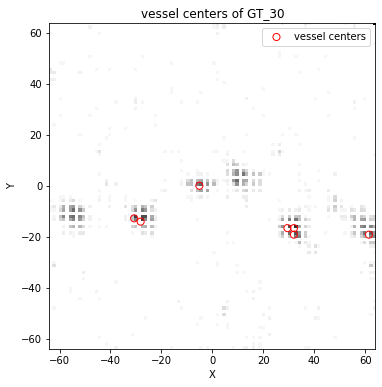

In [9]:
## GT_sownsample_30: thres=0.012

x_values = np.arange(64, -65, -2)  # From -64 to 64 with step 2
y_values = np.arange(64, -65, -2)  # From -64 to 64 with step 2
f_values = np.arange(-2, 2.1, 0.1)
dictionary = []
for f in f_values:  # Iterate over f
    for x in x_values:  # Iterate over x
        for y in y_values:  # Iterate over y
            dictionary.append([x, y, f])


y = load_nii("indices_ccmax_30.nii") 
y = np.squeeze(y)

y0 = []
for i in range(49152):
    y0.append(dictionary[int(y[i])-1])
y0 = np.array(y0)

x = np.asarray(y0[:, 0], dtype=float)
y = np.asarray(y0[:, 1], dtype=float)

watershed_thres(x,y,0.012,'vessel centers of GT_30')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


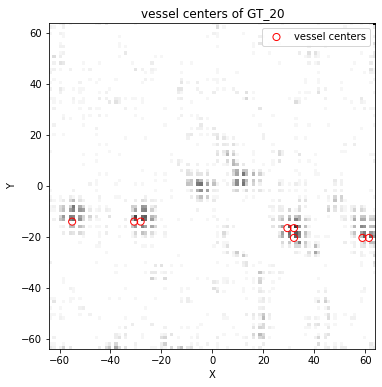

In [12]:
## GT_sownsample_20: thres=0.012

x_values = np.arange(64, -65, -2)  # From -64 to 64 with step 2
y_values = np.arange(64, -65, -2)  # From -64 to 64 with step 2
f_values = np.arange(-2, 2.1, 0.1)
dictionary = []
for f in f_values:  # Iterate over f
    for x in x_values:  # Iterate over x
        for y in y_values:  # Iterate over y
            dictionary.append([x, y, f])


y = load_nii("indices_ccmax_20.nii") 
y = np.squeeze(y)

y0 = []
for i in range(49152):
    y0.append(dictionary[int(y[i])-1])
y0 = np.array(y0)

x = np.asarray(y0[:, 0], dtype=float)
y = np.asarray(y0[:, 1], dtype=float)

watershed_thres(x,y,0.012,'vessel centers of GT_20')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


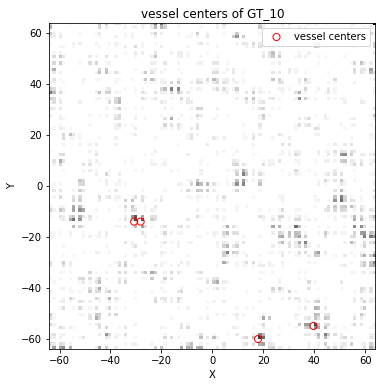

In [13]:
## GT_sownsample_10: thres=0.012

x_values = np.arange(64, -65, -2)  # From -64 to 64 with step 2
y_values = np.arange(64, -65, -2)  # From -64 to 64 with step 2
f_values = np.arange(-2, 2.1, 0.1)
dictionary = []
for f in f_values:  # Iterate over f
    for x in x_values:  # Iterate over x
        for y in y_values:  # Iterate over y
            dictionary.append([x, y, f])


y = load_nii("indices_ccmax_10.nii") 
y = np.squeeze(y)

y0 = []
for i in range(49152):
    y0.append(dictionary[int(y[i])-1])
y0 = np.array(y0)

x = np.asarray(y0[:, 0], dtype=float)
y = np.asarray(y0[:, 1], dtype=float)

watershed_thres(x,y,0.012,'vessel centers of GT_10')